In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

import scipy.stats.stats as stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Big Data Waterloo/Melbourne_housing_FULL.csv")

In [ ]:
df = df.dropna(subset=["Price"])
if "Postcode" in df: del df["Postcode"]
if "Address" in df: del df["Address"]
if "SellerG" in df: del df["SellerG"]

if "YearBuilt" in df: del df["YearBuilt"]
if "YearBuilt" in df: del df["BuildingArea"]

df = df.dropna()

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,2,h,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,3,h,1876000.0,S,2016-07-05,2.5,4.0,2.0,0.0,245.0,210.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,2,h,1636000.0,S,2016-08-10,2.5,2.0,1.0,2.0,256.0,107.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,2018-02-24,25.5,3.0,2.0,2.0,383.0,118.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,3,h,570000.0,SP,2018-02-24,25.5,3.0,2.0,2.0,404.0,158.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,2,h,888000.0,SP,2018-02-24,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,2018-02-24,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


Text(0.5, 1.0, 'Boxplot of Price with outliers')

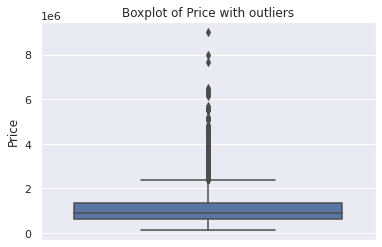

In [ ]:
sns.boxplot(y= df["Price"]).set_title('Boxplot of Price with outliers')

In [ ]:
# Computing IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df_price_iqr = df.query('(@Q1 - 1.5 * @IQR) <= Price <= (@Q3 + 1.5 * @IQR)')

Text(0.5, 1.0, 'Boxplot of Price without outliers')

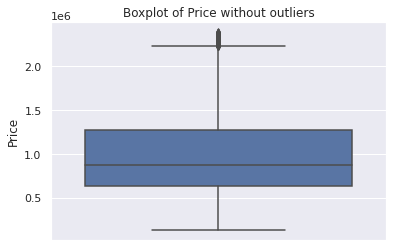

In [ ]:
sns.boxplot(y= df_price_iqr["Price"]).set_title('Boxplot of Price without outliers')

Text(0.5, 0.98, 'Distribution of Price')

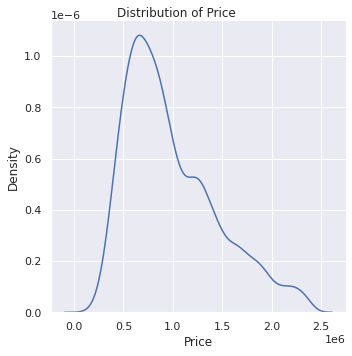

In [ ]:
plot = sns.displot(df_price_iqr, x="Price", kind="kde")
plot.fig.suptitle("Distribution of Price")

In [ ]:
np.log(df_price_iqr["Price"]).skew()

-0.05497205402153176

Text(0.5, 0.98, 'Distribution of log of Price')

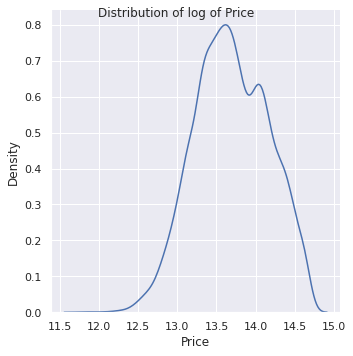

In [ ]:
plot = sns.displot(np.log(df_price_iqr["Price"]), kind="kde")
plot.fig.suptitle("Distribution of log of Price")

In [ ]:
df_price_iqr["Date"].sort_values()

8101    2016-03-09
7945    2016-03-09
10015   2016-03-09
10017   2016-03-09
5762    2016-03-09
           ...    
32269   2018-10-03
32336   2018-10-03
32337   2018-10-03
32339   2018-10-03
32310   2018-10-03
Name: Date, Length: 8779, dtype: datetime64[ns]

[Text(0.5, 0, '')]

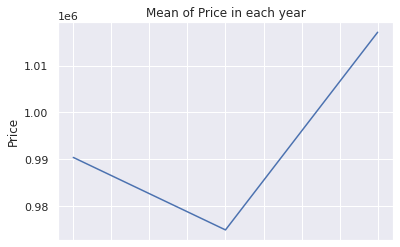

In [ ]:
t = df_price_iqr[["Date", "Price"]].groupby(pd.DatetimeIndex(df_price_iqr['Date']).year).mean()

plot = sns.lineplot(data = t["Price"])
# x_dates = df_price_iqr['Date'].dt.strftime('%Y-%m').sort_values().unique()
# plot.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plot.set_title('Mean of Price in each year')

plot.set(xticklabels=[])  # remove the tick labels
plot.set(xlabel=None)  # remove the axis label

In [ ]:
df_price_iqr

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,2,h,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,3,h,1876000.0,S,2016-07-05,2.5,4.0,2.0,0.0,245.0,210.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,2,h,1636000.0,S,2016-08-10,2.5,2.0,1.0,2.0,256.0,107.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,2018-02-24,25.5,3.0,2.0,2.0,383.0,118.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,3,h,570000.0,SP,2018-02-24,25.5,3.0,2.0,2.0,404.0,158.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,2,h,888000.0,SP,2018-02-24,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,2018-02-24,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


Text(0.5, 1.0, 'Boxplot of Rooms with outliers')

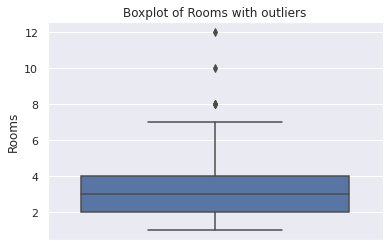

In [ ]:
sns.boxplot(y= df_price_iqr["Rooms"]).set_title('Boxplot of Rooms with outliers')

In [ ]:
df3 = df_price_iqr[df_price_iqr['Rooms'] <= 6]  


In [ ]:
df3 = df3[df3['Bathroom'] <= 4]  

Text(0.5, 1.0, 'Boxplot of Rooms without outliers')

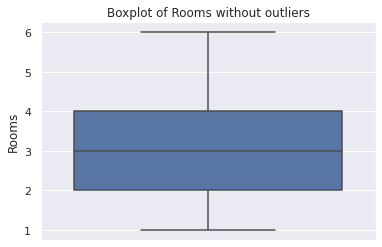

In [ ]:
sns.boxplot(y= df3["Rooms"]).set_title('Boxplot of Rooms without outliers')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


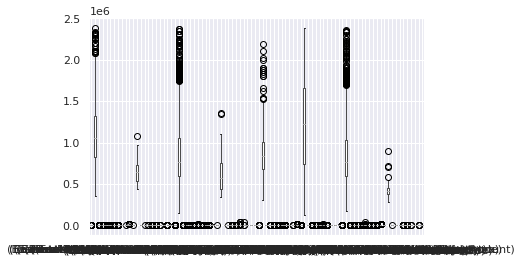

In [ ]:
grouped = df3.groupby('Regionname')
grouped.boxplot("price")

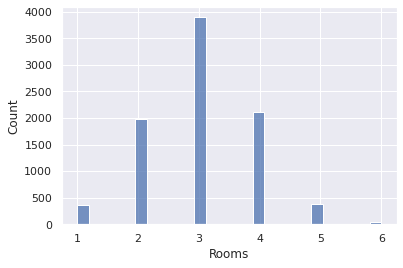

In [ ]:
seaborn.histplot(df3["Rooms"])

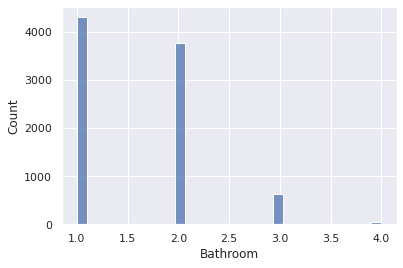

In [ ]:
sns.histplot(df3["Bathroom"])

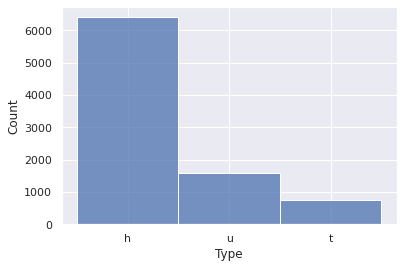

In [ ]:
sns.histplot(df3["Type"])

In [ ]:
df4 = df3

df4["logprice"] = np.log(df4["Price"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


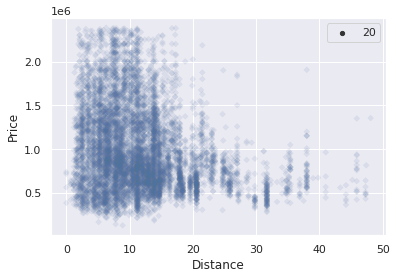

In [ ]:
sns.scatterplot(data=df3, x="Distance", y="Price", palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.10)

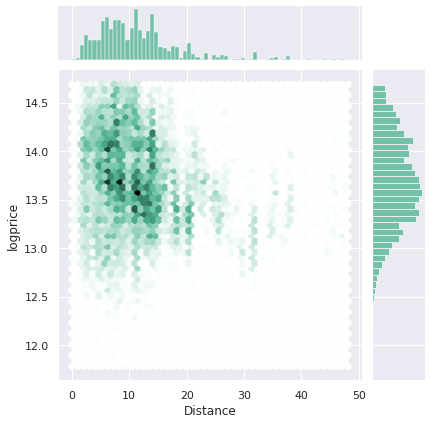

In [ ]:
sns.jointplot(data=df3, x="Distance", y="logprice", kind="hex", color="#4CB391")

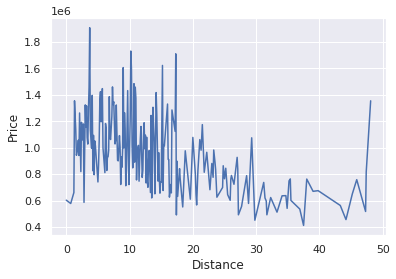

In [ ]:
t = df3.groupby(df3["Distance"]).mean()
sns.lineplot(data = t["Price"])

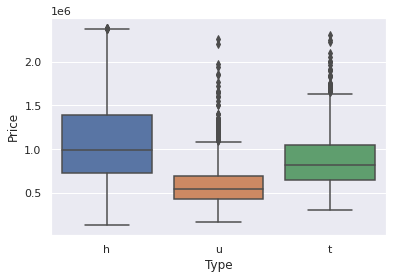

In [ ]:
sns.boxplot(data = df3, x= "Type", y= "Price")

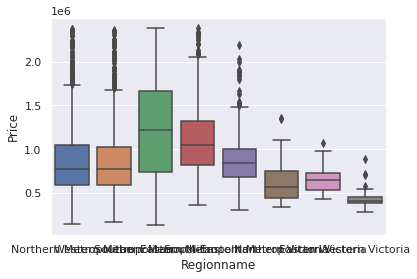

In [ ]:
sns.boxplot(data = df3, x= "Regionname", y= "Price")

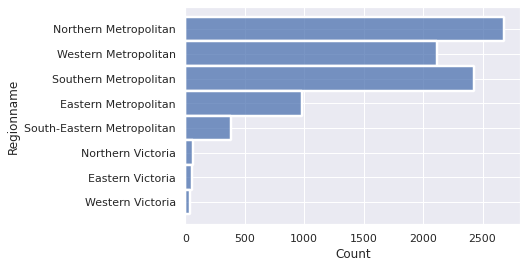

In [ ]:
sns.histplot(data = df3, y="Regionname")